# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-P1-y-P4" data-toc-modified-id="Cargar-la-intensidad-con-P1-y-P4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con P1 y P4</a></div><div class="lev2 toc-item"><a href="#Fitting-data-to-sine" data-toc-modified-id="Fitting-data-to-sine-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data to sine</a></div><div class="lev2 toc-item"><a href="#Calibration-parameters" data-toc-modified-id="Calibration-parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calibration parameters</a></div><div class="lev1 toc-item"><a href="#Otros-ajustes" data-toc-modified-id="Otros-ajustes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Otros ajustes</a></div><div class="lev2 toc-item"><a href="#Fitting-to-matrices---1:-sencillo" data-toc-modified-id="Fitting-to-matrices---1:-sencillo-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting to matrices - 1: sencillo</a></div><div class="lev2 toc-item"><a href="#Ajuste-global:-p0,-p1,-angulo" data-toc-modified-id="Ajuste-global:-p0,-p1,-angulo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ajuste global: p0, p1, angulo</a></div><div class="lev3 toc-item"><a href="#Verificación" data-toc-modified-id="Verificación-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Verificación</a></div><div class="lev3 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Comparación</a></div><div class="lev3 toc-item"><a href="#Conclusión" data-toc-modified-id="Conclusión-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Conclusión</a></div>

# Explorar influencia de parámetros

**Autor**: Jesús del Hoyo

**Fecha**:   27/08/2018

**Objetivo**: Ecograb project, polariscope callibration



In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from __future__ import print_function

import time
import pprint

from numpy import array, matrix, matmul, power, sum, size, zeros
from math import sin, cos, pi, sqrt
from cmath import exp

from phyton_optics import degrees , sp, plt

from scipy import optimize, exp
from scipy.io import loadmat

from polarimeter.utils import plot_experiment_residuals_1D
from polarimeter.polarimeter import (get_polarimeter_parameters, intensity, 
                                    polarimeter_matrices, get_light_parameters)

from phyton_optics.polarization_jones import rotation
from phyton_optics.polarization_stokes import polarizer_linear, rotate_mueller, polarized_light
from polarimeter.utils import dibujar_2d_fitting


from polarimeter.polarimeter import Intensity_Rotating_Elements
import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import numpy as np
import os

## Load data

In [7]:
# Go to the desired folder
#dir = 'calibration'
print(os.getcwd())
#os.chdir(dir)

# Load file, Experiment 1a
filename = 'Experimento_1a_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e1a = data['angle1']*degrees
I_e1a = data['intensity1']
Imax = data['intensity_max']

# Load file, Experiment 1b
filename = 'Experimento_1b_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e1b = data['angle1']*degrees
I_e1b = data['intensity1']

# Load file, Experiment 1c
filename = 'Experimento_1c_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e1c = data['angle1']*degrees
I_e1c = data['intensity1']


# Load file, Experiment 2a
filename = 'Experimento_2a_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e2a = data['angle1']*degrees
I_e2a = data['intensity1']

# Load file, Experiment 2b
filename = 'Experimento_2b_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e2b = data['angle1']*degrees
I_e2b = data['intensity1']

# Load file, Experiment IllumA
filename = 'Experimento_IlumA_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_eIa = data['angle1']*degrees
I_eIa = data['intensity1']

# Load file, Experiment IllumB
filename = 'Experimento_IlumB_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_eIb = data['angle1']*degrees
I_eIb = data['intensity1']

# Load file, IllumC
filename = 'Experimento_IlumC_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_eIcx = data['angle2x']*degrees
angle_eIcy = data['angle2x']*degrees
I_eIc = data['intensity2']

# Load file, Experiment 4
filename = 'Experimento_4_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e4x = data['angle2x']*degrees
angle_e4y = data['angle2y']*degrees
Imax_e4 = data['intensity_max']
I_e4 = data['intensity2']
#I_e4 = I_e4[0:15,0:14] # Wrongy created as a 90x90 zero's matrix

# Load file, Experiment 5
filename = 'Experimento_5a_2018-08-23.npz'
data = np.load(filename)
# Rename variables
angle_e5ax = data['angle2x']*degrees
angle_e5ay = data['angle2y']*degrees
Imax_e5a = data['intensity_max']
I_e5a = data['intensity2']



D:\Codigo UCM\polarimeter\notebooks\calibration


## Experiment 4: Rotating both pols

This experiment is done to measure the parameters of the diattenuator retarder. Also, this is the trial by fire, as the model uses to fail here.

Fit parameters for the quarter waveplate: A = 0.991459163262; B = 0.998521011909; delta = 94.8926647532º; Th0 = 141.300003461º;
[0.0077090689366960145, 0.06839995570349254]


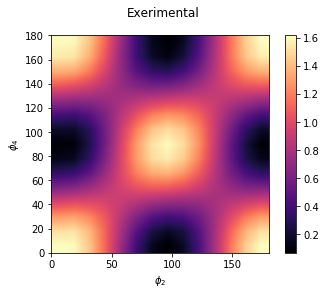

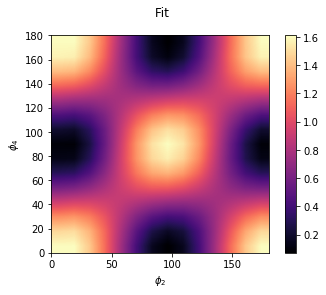

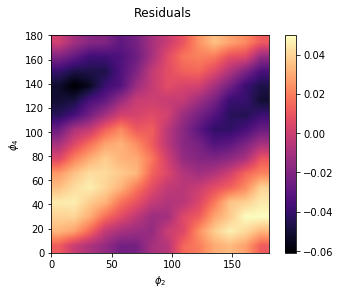

In [8]:
# Initial parameters
pF = 0.03
#Jp1 = pj.real_polarizer(0.987890699132, pF)
#Jp2 = pj.real_polarizer(0.978894122499, pF)
Jp1 = pj.real_polarizer(0.987890699132, 0.146027198644)
Jbs = pj.real_polarizer(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = pj.elliptical_light(parE[0], parE[1], parE[2], parE[3])
#E0 = 1.38512099075
par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
# Define calculating and distance functions
def model_func2D(par, th1, th2): 
    Jp1 = pj.real_polarizer(0.987890699132, par[4])
    Jp2 = pj.real_polarizer(0.978894122499, par[4])
    Jr = pj.diattenuator_retarder(delta = par[2], A = par[0], B = par[1])    
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]
    I = Intensity_Rotating_Elements(J, th, E0) + par[5]
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, I_e4))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
#print((par1[4]/degrees)%180)
print([par1[4], par1[5]])
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e4x, angle_e4y)
residuals = I_e4 - I_fitting
dibujar_2d_fitting(angle_e4x, angle_e4y, I_e4, title='Exerimental')
dibujar_2d_fitting(angle_e4x, angle_e4y, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
#A = 0.983778590915; B = 1.01690942947; delta = 84.1657585298º; Th0 = 140.449239515º;

Fit parameters: P1 = 0.951192960042; P2 = 0.268287006839; Th0 = 98.6148257258; d = 1.26248456097;


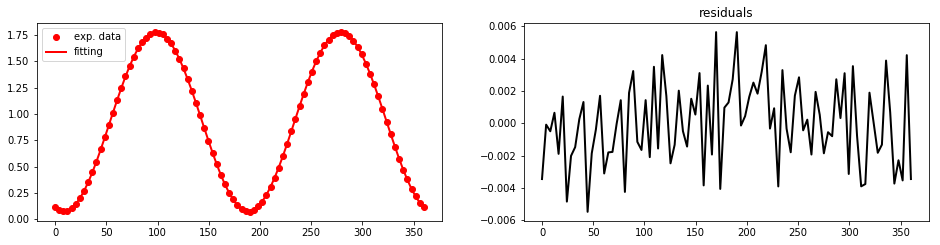

In [9]:
# Initial parameters
par0 = [.9, 0.15, 90*degrees, 1]
th0 = 0*degrees
# Define calculating and distance functions
def model_func1D(par, th1): 
    Mp = ps.polarizer_linear(par[0], par[1])
    Mp = Mp * ps.depolarizer(par[3])
    M = [Mp, Mp]
    th = [th0, th1 - par[2]]
    I = Intensity_Rotating_Elements(M, th, Ei = Imax/2)
    I = np.squeeze(I)
    return I
def err_func1D(par, th1, y): 
    dI = model_func1D(par, th1) - y 
    return dI
# Check
Dtest = err_func1D(par0, angle_e1a, I_e1a)
# Start optimization
par1, success = optimize.leastsq(err_func1D, par0, args=(angle_e1a, I_e1a))
# Print parameters
print('Fit parameters: P1 = {}; P2 = {}; Th0 = {}; d = {};'.format(par1[0], par1[1], (par1[2]/degrees)%180, par1[3] ))
# Print results
I_fitting = model_func1D(par1, angle_e1a)
plot_experiment_residuals_1D(angle_e1a, I_e1a, I_fitting,  title='')

$((IM - Im + IM*d + Im*d - 2*d*(((IM - Im)*(IM + Im))/d)^{1/2})/(2*I0*d))^{1/2}$

**Calculation of the effect of depolarization**

The effect of depolarization (if present) in the calculation of polarizer parameters is as following. If we consider the polarizer as a depolarizer like:

$M_{pol} = M_{perf pol} * M_{depol}$

with

$M_{depol} = \left[ {\begin{array}{cccc}
   1 & 0 & 0 & 0 \\
   0 & d & 0 & 0 \\
   0 & 0 & d & 0 \\
   0 & 0 & 0 & d \\
  \end{array} } \right]$
  
then, the polarizer parameters are:

$P_{1,2} = \left[ \frac{I_M*(d+1)+I_m*(d-1)\pm 2*\sqrt{\frac{I^2_M-I^2_m}{d}}} {2*I_0*d} \right]^{1/4}$

If I compute both values for d from 1 (no depolarization) to 0 (total depolarization) we obtain:

[0.9744475103686346, 0.03485732290838223]


D:\Archivos de programa\Anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


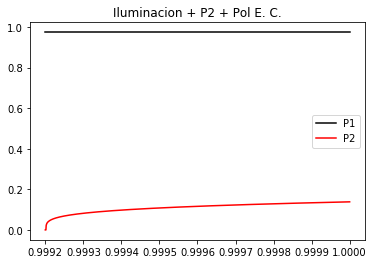

In [10]:
# Take data from measurements
I0 = Imax
IM = max(I_e1a)
Im = min(I_e1a)
# Set range of values
nd = 1000
darray = np.linspace(0.9992,1,nd)
# Calculate values
p1 = zeros(nd)
p2 = zeros(nd)
for ind, d in enumerate(darray):
    # First parameter
    x = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
    if x > 1:
        p1[ind] = 2
    else:
        p1[ind] = x
    # Second parameter
    x = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
    if np.iscomplex(x):
        p2[ind] = 0
    elif np.isnan(x):
        p2[ind] = 0
    else:
        p2[ind] = x
# Plot results
plt.figure()
plt.plot(darray, p1,'k', label='P1')
plt.hold = True
plt.title('Iluminacion + P2 + Pol E. C.')
plt.plot(darray, p2,'r', label='P2')
plt.legend()
# One example
d = 0.999205
p1 = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
p2 = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
print([p1, p2])

So small depolarization of the polarizer drastically changes the measured $P_2$ parameter. So let's see if using it we can accomodate the fit of the retarder. Let's use d = 0.999205, as it renders a very low value for P2, which seems to be what we need for fitting Experiment 4.

0.01758983006631359
Fit parameters for the quarter waveplate: A = 1.04453108663; B = 1.04785797248; delta = 85.3887745662º; Th0 = 141.338037641º;
[0.0, 0.0, 0.0]


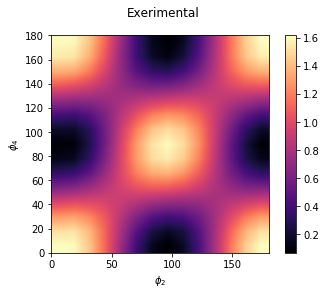

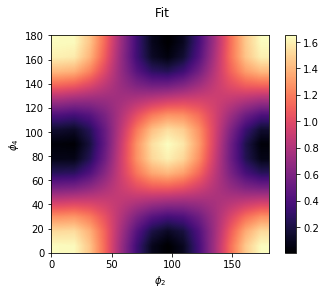

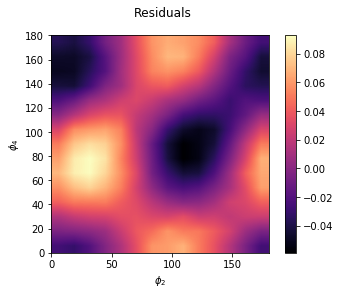

In [17]:
# Initial parameters
d = 0.999202
I0 = Imax
IM = max(I_e1a)
Im = min(I_e1a)
p1 = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
p2 = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
print(p2)
#Jp1 = pj.real_polarizer(0.987890699132, pF)
#Jp2 = pj.real_polarizer(0.978894122499, pF)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
#E0 = 1.38512099075
par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
# Define calculating and distance functions
def Mueller_Retarder(p1, p2, delta):
    suma = p1**2 + p2**2
    dif = p1**2 - p2**2
    mult = 2*p1*p2
    cd = cos(delta)
    sd = sin(delta)
    M = 0.5 * matrix(array([[suma, dif, 0, 0],
                     [dif, suma, 0, 0],
                     [0, 0, mult*cd, mult*sd],
                     [0, 0, -mult*sd, mult*cd]]))
    return M
def model_func2D(par, th1, th2): 
    #Jp1 = Mueller_Retarder(p1, p2, par[4])
    Jp1 = ps.polarizer_linear(p1, p2)
    Jd = ps.depolarizer(d)
    Jp1 = Jp1 * Jd
    Jp2 = Jp1
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jp2]
    th = [th1-th0[0], par[3], -th0[1], th2-th0[2]]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e4x, angle_e4y, I_e4))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
#print((par1[4]/degrees)%180)
print([par1[4], (par1[4]/degrees)%180, par1[5]])
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e4x, angle_e4y)
residuals = I_e4 - I_fitting
dibujar_2d_fitting(angle_e4x, angle_e4y, I_e4, title='Exerimental')
dibujar_2d_fitting(angle_e4x, angle_e4y, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e4x, angle_e4y, residuals, title='Residuals')
#A = 0.983778590915; B = 1.01690942947; delta = 84.1657585298º; Th0 = 140.449239515º;

Let's see if we can fit the two retarders experiment.

0.01758983006631359
Fit parameters for the quarter waveplate: Th0 = 107.637801299º;


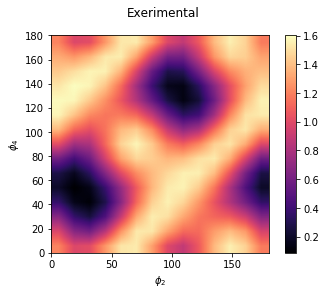

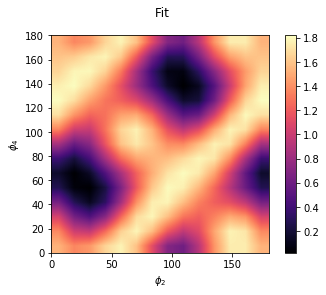

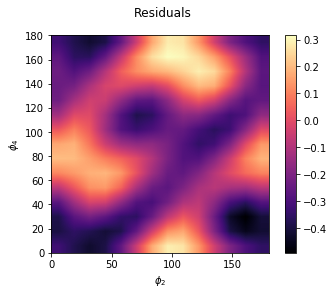

In [42]:
# Initial parameters
#d = 0.999202
I0 = Imax
IM = max(I_e1a)
Im = min(I_e1a)
p1 = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
p2 = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
print(p2)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
th0 = [125.991665264*degrees, 138.627970066*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR = [0.74190577422, 0.737973853936, 85.4960076729*degrees]
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = 0
# Define calculating and distance functions
def Mueller_Retarder(p1, p2, delta):
    suma = p1**2 + p2**2
    dif = p1**2 - p2**2
    mult = 2*p1*p2
    cd = cos(delta)
    sd = sin(delta)
    M = matrix(array([[suma, dif, 0, 0],
                     [dif, suma, 0, 0],
                     [0, 0, mult*cd, mult*sd],
                     [0, 0, -mult*sd, mult*cd]]))
    return M
def model_func2D(par, th1, th2): 
    #Jp1 = Mueller_Retarder(p1, p2, par[4])
    Jp1 = ps.polarizer_linear(p1, p2)
    Jd = ps.depolarizer(d)
    Jp1 = Jp1 * Jd
    Jp2 = Jp1
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(parR[0], parR[1], parR[2])
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th1-th0[1], -th0[2], th2-par[0], -th0[3]]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: Th0 = {}º;'.format(
        (par1[0]/degrees)%180 ))
#print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

0.01758983006631359
Fit parameters for the quarter waveplate: A = 0.713920553713; B = 0.712720990529; delta = 79.6101495548º; Th0 = 16.2790801461º;
39.91696210427815


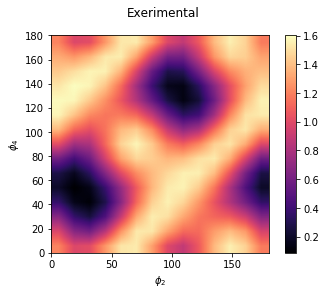

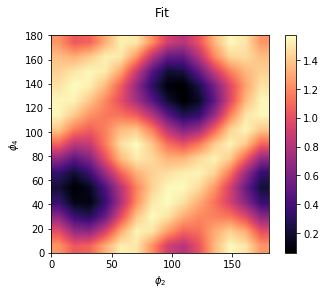

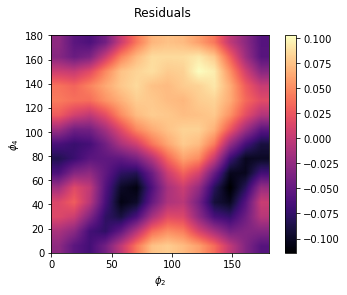

In [43]:
# Initial parameters
d = 0.999202
I0 = Imax
IM = max(I_e1a)
Im = min(I_e1a)
p1 = ((IM*(d+1) + Im*(d-1) + 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
p2 = ((IM*(d+1) + Im*(d-1) - 2*sqrt((IM**2 - Im**2)/d))/(2*I0*d))**0.25
print(p2)
Jbs = ps.polarizer_linear(0.925696636356, 0.937202919055)
Jp1 = ps.polarizer_linear(p1, p2)
Jd = ps.depolarizer(d)
Jp1 = Jp1 * Jd
Jp2 = Jp1
th0 = [125.991665264*degrees, 138.627970066*degrees, 176.510741175*degrees, 135.63283835*degrees]
parE = [1.38512099075, 1.39758351467, 90.3508816116*degrees, 104.96651768*degrees]
E0 = ps.circular_light()*Imax
parR = [0.74190577422, 0.737973853936, 85.4960076729*degrees]
#E0 = 1.38512099075
#par0 = [.95, 0.95, 90*degrees, 0, 0, 0]
par0 = [0.75, 0.75, 85*degrees, 0, 0]
# Define calculating and distance functions
def Mueller_Retarder(p1, p2, delta):
    suma = p1**2 + p2**2
    dif = p1**2 - p2**2
    mult = 2*p1*p2
    cd = cos(delta)
    sd = sin(delta)
    M = matrix(array([[suma, dif, 0, 0],
                     [dif, suma, 0, 0],
                     [0, 0, mult*cd, mult*sd],
                     [0, 0, -mult*sd, mult*cd]]))
    return M
def model_func2D(par, th1, th2): 
    #Jp1 = Mueller_Retarder(p1, p2, par[4])
    # Jr = ps.diattenuating_retarder_deprecated(par[0], par[1], par[2])    # Funcion está mal
    Jr = Mueller_Retarder(par[0], par[1], par[2])
    J = [Jp1, Jr, Jbs, Jr, Jp2]
    th = [-th0[0], th1-par[4], -th0[2], th2-par[3], -th0[3]]
    I = Intensity_Rotating_Elements(J, th, Imax/2)
    #I = Intensity_Rotating_Elements(J, th, E0)
    return I
def err_func2D(par, th1, th2, y): 
    dI = model_func2D(par, th1, th2) - y 
    return dI.flatten()
# Optimize
par1, success = optimize.leastsq(err_func2D, par0, args=(angle_e5ax, angle_e5ay, I_e5a))
# Print results
print('Fit parameters for the quarter waveplate: A = {}; B = {}; delta = {}º; Th0 = {}º;'.format(
        par1[0], par1[1], (par1[2]/degrees)%180, (par1[3]/degrees)%180 ))
print((par1[4]/degrees)%180)
#par1[3] = 45*degrees
#par1 = [1, 1, pi/2, pi/4]
I_fitting = model_func2D(par1, angle_e5ax, angle_e5ay)
residuals = I_e5a - I_fitting
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_e5a, title='Exerimental')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, I_fitting, title='Fit')
dibujar_2d_fitting(angle_e5ax, angle_e5ay, residuals, title='Residuals')

## Conclusion

It is plausible to think that the polarizers show some degree 